In [2]:
# Import necessary packages
from models.model2_linear import Dynamic_Bicycle_Linear
from models.model2 import BicycleModel
from models.model4 import FourWheelModel
from models.utils import fit_circle
import matplotlib.pyplot as plt
import numpy as np

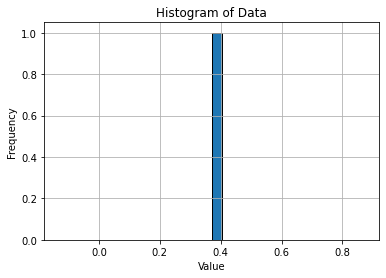

Iteration  0


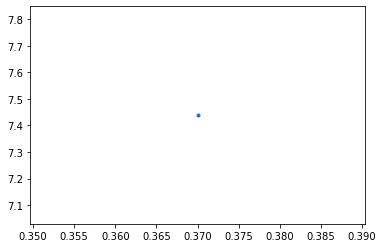

In [9]:
# Generate data for Dynamic_Bicycle_Linear

np.random.seed(2023)

def get_circle_radius(model):
    
    t0 = 0
    N = model.open_loop_tf/model.dt
    
    steering = 0.2
    torque = 40
    
    inputs = [steering, torque, torque, torque, torque]


    t,x_vect = model.do_open_loop_sim_cst_inputs(t0, inputs)
    
    x = x_vect[int(N/2):,0]
    y = x_vect[int(N/2):,1]

    radius = fit_circle(x, y)
    #plt.plot(x,y)
    #plt.axis('equal')
    return radius

dt = 0.005
open_loop_tf = 50

T_peak_mean = 0.37
T_slope = 0.4




def plot_histogram_1dnparray(data):
    # Plot the histogram
    plt.hist(data, bins=30, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.grid(True)

    # Show the plot
    plt.show()

data_size = 1
T_peak_vector = np.full(data_size, T_peak_mean)
radiuses = np.empty(data_size)
for i in range(data_size):
    T_peak_vector[i] += 0 #np.random.normal(0,0.1)

plot_histogram_1dnparray(T_peak_vector)

velocity = 5
#Generate circles
for i in range(data_size):
    model2_lin = Dynamic_Bicycle_Linear(velocity, dt, open_loop_tf, T_peak_vector[i], T_slope)
    radius2_lin = get_circle_radius(model2_lin)
    radiuses[i] = radius2_lin
    
    if i%10==0:
        print('Iteration ', i)

plt.plot(T_peak_vector, radiuses, '.')

# Combine x and y arrays horizontally
data = np.column_stack((T_peak_vector, radiuses))

# Save the data to a CSV file
np.savetxt('./Data/Data_Bicycle_linear/radiuses.csv', data, delimiter=',', header='T_peak,R', comments='')




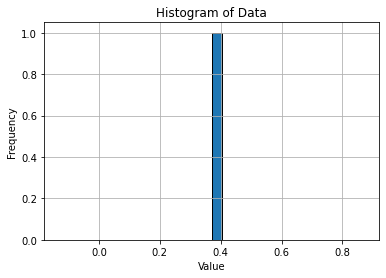

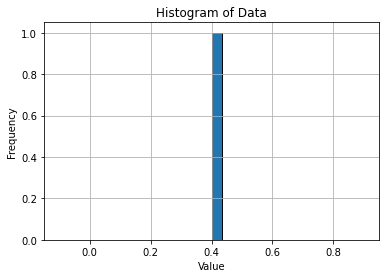

Iteration  0


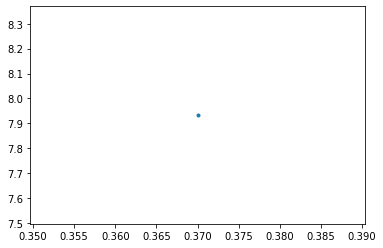

In [17]:
# Generate data for BicycleModel

np.random.seed(2023)

def get_circle_radius(model):
    
    t0 = 0
    N = model.open_loop_tf/model.dt
    
    steering = 0.2
    torque = 100
    
    inputs = [steering, torque, torque, torque, torque]


    t,x_vect = model.do_open_loop_sim_cst_inputs(t0, inputs)
    
    x = x_vect[int(N/2):,0]
    y = x_vect[int(N/2):,1]

    radius = fit_circle(x, y)
    #plt.plot(x,y)
    #plt.axis('equal')
    return radius

dt = 0.05
open_loop_tf = 50

T_peak_mean = 0.37
T_slope_mean = 0.4




def plot_histogram_1dnparray(data):
    # Plot the histogram
    plt.hist(data, bins=30, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.grid(True)

    # Show the plot
    plt.show()

data_size = 1
T_peak_vector = np.full(data_size, T_peak_mean)
T_slope_vector = np.full(data_size, T_slope_mean)
radiuses = np.empty(data_size)
for i in range(data_size):
    T_peak_vector[i] += 0 #np.random.normal(0,0.001)
    T_slope_vector[i] += 0

plot_histogram_1dnparray(T_peak_vector)
plot_histogram_1dnparray(T_slope_vector)

#Generate circles
for i in range(data_size):
    model2_lin = BicycleModel(dt, open_loop_tf, T_peak_vector[i], T_slope)

    radius2_lin = get_circle_radius(model2_lin)
    radiuses[i] = radius2_lin
    
    if i%10==0:
        print('Iteration ', i)

plt.plot(T_peak_vector, radiuses, '.')

# Combine x and y arrays horizontally
data = np.column_stack((T_peak_vector, T_slope_vector,radiuses))

# Save the data to a CSV file
np.savetxt('./Data/Data_Bicycle/radiuses.csv', data, delimiter=',', header='T_peak, T_slope, R', comments='')


